# Dimensionality Reduction with PCA

## Dimensionality Reduction
While working with data, it is common to have access to very high-dimensional unstructured informations (e.g. images, sounds, ...). To work with them, it is necessary to find a way to project them into a low-dimensional space where data which is semantically similar is close. This approach is called **dimensionality reduction**.

For example, assume our data can be stored in an $d \times N$ array,

$$
    X = [ x^1 x^2 \dots x^N ] \in \mathbb{R}^{d \times N}
$$

where each datapoint $x^j \in \mathbb{R}^d$. The idea of dimensionality reduction techniques in ML is to find a projector operator $P: \mathbb{R}^d \to \mathbb{R}^k$, with $k \ll d$, such that in the projected space $P(x)$, images semantically similar are close together. If the points in a projected space forms isolated popoulations such that _inside_ of each popoulation the points are close, while the distance _between_ popoulations is large, we call them **clusters**. A clusering algorithm is an algorithm which is able to find clusters from high-dimensional data.

## Principal Component Analysis (PCA)
Principal Componenti Analyisis (PCA) is probabily the simplest yet effective technique to perform dimensionality reduction and clustering. It is an unsupervised algorithm, thus it does not require any label.

The idea is the following: consider a dataset $X \in \mathbb{R}^{d \times N}$ of high-dimensional data and assume we want to project it into a low-dimensional space $\mathbb{R}^k$. Define:

$$
    Z = [z^1 z^2 \dots z^N] \in \mathbb{R}^{k \times N}
$$

the projected version of $X$. We want to find a matrix $P \in \mathbb{R}^{k \times d}$ such that $Z = PX$, with the constraint that in the projected space we want to keep as much information as possible from the original data $X$. 

You already studied that, when you want to project a matrix by keeping informations, a good idea is to use the Singular Value Decomposition (SVD) of it and, in particular, the Truncated SVD (TSVD). Let $X \in \mathbb{R}^{d \times N}$, then

$$
    X = U \Sigma V^T
$$

is the SVD of $X$, where $U \in \mathbb{R}^{d \times d}$, $V \in \mathbb{R}^{N \times N}$ are orthogonal matrices ($U^T U = U U^T = I$ and $V V^T = V^T V = I$), while $\Sigma \in \mathbb{R}^{d \times N}$ is a diagonal matrix whose diagonal elements $\sigma_i$ are the singular values of $X$, in decreasing order ($\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_d$). Since the singular values represents the _quantity of informations_ contained in the corresponding singular vectors, keeping the first $k$ singular values and vectors can be the solution to our projection problem. Indeed, given $k < d$, we define the Truncated SVD of $X$ as

$$
    X_k = U_k \Sigma_k V^T_k
$$

where $U_k \in \mathbb{R}^{d \times k}$, $\Sigma_k \in \mathbb{R}^{k \times k}$, and $V_k \in \mathbb{R}^{k \times N}$. 

The PCA use this idea and defines the projection matrix as $P = U_k^T$, and consequently,

$$
    Z = U_k^T X
$$

is the projected space. Here, the columns of $U_k$ are called **feature vectors**, while the columns of $Z$ are the **principal components** of $X$.

### Implementation
To implement PCA, we first need to _center_ the data. This can be done by defining its centroid.

> Given a set $X = [x^1 x^2 \dots x^N]$, its **centroid** is defined as $ c(X) = \frac{1}{N} \sum_{i=1}^N x^i$.

Thus, the implementation of PCA is as follows:

* Consider the dataset $X$;
* Compute the centered version of $X$ as $X_c = X - c(X)$, where the subtraction between matrix and vector is executed _column-by-column_;
* Compute the SVD of $X_c$, $X_c = U\Sigma V^T$;
* Given $k < n$, compute the Truncated SVD of $X_c$: $X_{c, k} = U_k \Sigma_k V_k^T$;
* Compute the projected dataset $Z_k = U_k^T X_c$;

### Python example
In the following, we consider as an example the MNIST dataset, which can be download from Kaggle ([kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer)). For simplicity, I renamed it as `data.csv` and I placed it a folder named `data` into the current project folder.

In [1]:
import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('./data/data.csv')

After that, it is important to inspect the data, i.e. to look at its structure and understand how it is distributed. This can be done either by reading at the documentation of the website where the data has been downloaded or by using the `pandas` method `.head()`.

In [2]:
# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
print(data.head())

Shape of the data: (42000, 785)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

which prints out all the columns of `data` and the first 5 rows of each column. With this command, we realize that our dataset is a $42000 \times 785$ frame, where the columns from the second to the last are the pixels of an image representing an handwritten digit, while the first column is the _target_, i.e. the integer describing the represented digit. 

In [3]:
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 42000) (42000,)


Here, we convert the dataframe into a matrix with `numpy`, and then we split the input matrix $X$ and the corresponding target vector $Y$. Finally, we note that $X$ is an $N \times d$ matrix, where $N = 42000$ and $d = 784$. Since in our notations the shape of $X$ **should** be $d \times N$, we have to transpose it. 

### Visualizing the digits
We already said that $X$ is a dataset of images representing handwritten digits. We can clearly visualize some of them. In the documentation, we can read that each datapoint is a $28 \times 28$ grey-scale image, which has been flattened. Flattening is the operation of taking a 2-dimensional array (a matrix) and converting it to a 1-dimensional array, by concatenating the rows of it. This can be implemented in `numpy` with the function `a.flatten()`, where `a` is a 2-dimensional numpy array.

Since we know that the dimension of each image was $28 \times 28$ before flattening, we can invert this procedure by **reshaping** them. After that, we can simply visualize it with the function `plt.imshow()` from `matplotlib`, by setting the `cmap` to `'gray'` since the images are grey-scale.

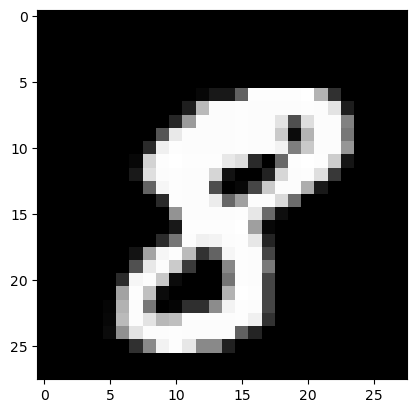

The associated digit is: 8


In [4]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

### Splitting the dataset
Before implementing the algorithm performing PCA, you are required to split the dataset into a training set and a test set. Remember that to correctly split $X$, it has to be random. 

In [5]:
def split_data(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Test it
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y, 30_000)

print(X_train.shape, X_test.shape)

(784, 30000) (784, 12000)


Now the dataset $(X, Y)$ is divided into the train and test components, and we can implement the PCA algorithm on $X_{train}$. Remember to not access $X_{test}$ during training.



In [6]:
# Compute centroid
cX = np.mean(X, axis=1)

# Make it a column vector
cX = np.reshape(cX, (d, 1))
print(cX.shape)

# Center the data
Xc = X - cX

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 2
Uk = U[:, :k]

# Define projection matrix
P = Uk.T

# Project X_train -> Z_train
Z_train = P @ X_train
print(Z_train.shape)

(784, 1)


(2, 30000)


```{warning}
When the full SVD decomposition is not required (as it is the case for PCA), one can compute the (reduced) SVD decomposition of a matrix $X$ as `np.linalg.svd(X, full_matrices=False)`, to save computation time.
```

### Visualizing clusters
When $k=2$, it is possible to visualize clusters in Python. In particular, we want to plot the datapoints, with the color of the corresponding class, to check how well the clustering algorithm performed in 2-dimensions. This can be done by the `matplotlib` function `plt.scatter`. In particular, if $Z_{train} = [z^1 z^2 \dots z^N] \in \mathbb{R}^{2 \times N}$ is the projected dataset and $Y_{train} \in \mathbb{R}^N$ is the vector of the corresponding classes, then the $Z_{train}$ can be visualized as:

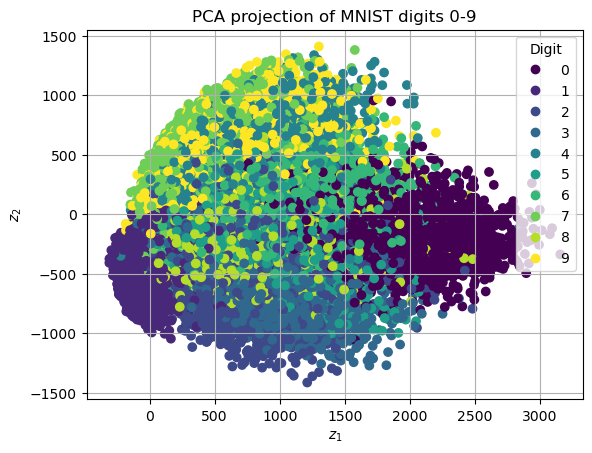

In [7]:
# Visualize the clusters
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train)
plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 0-9")
plt.grid()
plt.show()

Due to the high number of represented digits, a few of them appear to be overlapped. This is due to $k=2$ being too low, and PCA being too simple to be able to capture the complexity of such a large number of digits.

However, a few digits, such as numbers 0 and 1, appear to be well-separated, showing that the algorithm is performing well.

### Filtering digits
To simplify the dimensionality reduction task provided by PCA, we can consider filtering out just a few digits from MNIST dataset. This can be simply done by defining a boolean `ndarray` whose value in position $i$ is `True` if and only if the digit in the corresponding index represents one of the selected digit.

In the following, we show how this can be implemented for the digits $3$ and $4$.

In [8]:
# Define the boolean array to filter out digits
filter_3or4 = (Y==3) | (Y==4)

# Define the filtered data
X_3or4 = X[:, filter_3or4]
Y_3or4 = Y[filter_3or4]

> **Exercise:** Repeat the PCA analysis for $k=2$ on the filtered dataset. Remember the `train_test_split()`.